In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, multi_gpu_model

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [4]:
data_dir = 'data/'

In [5]:
train_data = np.load(path.join(data_dir, 'imagenet_6_class_train_data.npz'))
val_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))
test_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))

In [6]:
x_train = train_data['x_data']
y_train = train_data['y_data']
x_val = val_data['x_data']
y_val = val_data['y_data']
x_test = test_data['x_data']
y_test = test_data['y_data']
y_table_array = test_data['y_table_array']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table_array.shape

((4680, 341, 341, 3),
 (4680,),
 (1560, 341, 341, 3),
 (1560,),
 (1560, 341, 341, 3),
 (1560,),
 (6, 2))

In [7]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((4680, 341, 341, 3),
 (4680, 6),
 (1560, 341, 341, 3),
 (1560, 6),
 (1560, 341, 341, 3),
 (1560, 6))

In [8]:
y_list = [text for _, text in y_table_array]
y_list

['bed', 'bird', 'cat', 'dog', 'house', 'tree']

In [9]:
input_shape = x_train[0].shape
output_size = len(y_list)

In [10]:
def build_2d_cnn_custom_ch_64_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=5, filters=64*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=3, strides=(3,3), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.75)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [11]:
for i in range(1, 6):
    model = build_2d_cnn_custom_ch_64_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 341, 341, 64)      4864      
_________________________________________________________________
activation (Activation)      (None, 341, 341, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 114, 114, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 831744)            0         
_________________________________________________________________
dropout (Dropout)    

Train on 4680 samples, validate on 1560 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.4816 - acc: 0.4112
Epoch 00001: val_loss improved from inf to 1.21644, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_2_conv_checkpoint/001-1.2164.hdf5
4680/4680 [==============================] - 25s 5ms/sample - loss: 1.4808 - acc: 0.4120 - val_loss: 1.2164 - val_acc: 0.5474
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.1342 - acc: 0.5786
Epoch 00002: val_loss improved from 1.21644 to 1.03582, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_2_conv_checkpoint/002-1.0358.hdf5
4680/4680 [==============================] - 23s 5ms/sample - loss: 1.1337 - acc: 0.5788 - val_loss: 1.0358 - val_acc: 0.6231
Epoch 3/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.0011 - acc: 0.6415
Epoch 00003: val_loss impr

4672/4680 [============================>.] - ETA: 0s - loss: 0.3262 - acc: 0.8940
Epoch 00023: val_loss improved from 0.71359 to 0.71302, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_2_conv_checkpoint/023-0.7130.hdf5
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.3259 - acc: 0.8940 - val_loss: 0.7130 - val_acc: 0.7474
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3053 - acc: 0.9067
Epoch 00024: val_loss did not improve from 0.71302
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.3051 - acc: 0.9068 - val_loss: 0.7285 - val_acc: 0.7564
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2713 - acc: 0.9180
Epoch 00025: val_loss did not improve from 0.71302
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.2720 - acc: 0.9177 - val_loss: 0.7872 - val_acc: 0.7327
Epoch 26/500
4672/4680 [============================>.] - ETA: 0s - loss: 

Epoch 53/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0863 - acc: 0.9739
Epoch 00053: val_loss did not improve from 0.71302
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.0862 - acc: 0.9739 - val_loss: 0.9473 - val_acc: 0.7532
Epoch 54/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0826 - acc: 0.9745
Epoch 00054: val_loss did not improve from 0.71302
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.0826 - acc: 0.9746 - val_loss: 0.9959 - val_acc: 0.7404
Epoch 55/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0962 - acc: 0.9722
Epoch 00055: val_loss did not improve from 0.71302
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.0961 - acc: 0.9722 - val_loss: 0.9301 - val_acc: 0.7532
Epoch 56/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0806 - acc: 0.9771
Epoch 00056: val_loss did not improve from 0.71302
4680/4680 [===========================

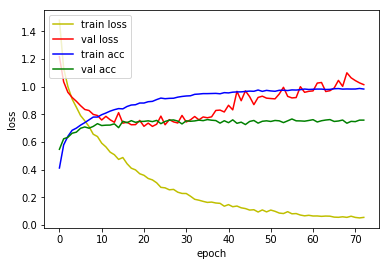

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.7130 - acc: 0.7474
Loss: 0.7130152032925532 Accuracy: 0.74743587

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.6416 - acc: 0.3157
Epoch 00001: val_loss improved from inf to 1.36706, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_3_conv_checkpoint/001-1.3671.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 1.6409 - acc: 0.3165 - val_loss: 1.3671 - val_acc: 0.4776
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.2872 - acc: 0.4944
Epoch 00002: val_loss improved from 1.36706 to 1.16384, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_3_conv_checkpoint/002-1.1638.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 1.2873 - acc: 0.4938 - val_loss: 1.1638 - val_acc: 0.5442
Epoch 3/500
4672/4680 [==========

4672/4680 [============================>.] - ETA: 0s - loss: 0.5095 - acc: 0.8208
Epoch 00023: val_loss improved from 0.63547 to 0.62476, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_3_conv_checkpoint/023-0.6248.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.5094 - acc: 0.8209 - val_loss: 0.6248 - val_acc: 0.7801
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4938 - acc: 0.8303
Epoch 00024: val_loss improved from 0.62476 to 0.61392, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_3_conv_checkpoint/024-0.6139.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.4938 - acc: 0.8299 - val_loss: 0.6139 - val_acc: 0.7853
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4942 - acc: 0.8217
Epoch 00025: val_loss improved from 0.61392 to 0.59089, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_6

Epoch 49/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2538 - acc: 0.9137
Epoch 00049: val_loss did not improve from 0.53878
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.2537 - acc: 0.9139 - val_loss: 0.5681 - val_acc: 0.8218
Epoch 50/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2477 - acc: 0.9146
Epoch 00050: val_loss did not improve from 0.53878
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.2473 - acc: 0.9147 - val_loss: 0.5550 - val_acc: 0.8212
Epoch 51/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2459 - acc: 0.9116
Epoch 00051: val_loss did not improve from 0.53878
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.2471 - acc: 0.9113 - val_loss: 0.5952 - val_acc: 0.7981
Epoch 52/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2721 - acc: 0.9050
Epoch 00052: val_loss improved from 0.53878 to 0.53628, saving model to model/checkpoint/

4672/4680 [============================>.] - ETA: 0s - loss: 0.1311 - acc: 0.9574
Epoch 00078: val_loss did not improve from 0.53046
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.1310 - acc: 0.9575 - val_loss: 0.6046 - val_acc: 0.8250
Epoch 79/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1201 - acc: 0.9563
Epoch 00079: val_loss did not improve from 0.53046
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.1205 - acc: 0.9560 - val_loss: 0.6086 - val_acc: 0.8212
Epoch 80/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1189 - acc: 0.9636
Epoch 00080: val_loss did not improve from 0.53046
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.1189 - acc: 0.9637 - val_loss: 0.6145 - val_acc: 0.8212
Epoch 81/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1219 - acc: 0.9576
Epoch 00081: val_loss did not improve from 0.53046
4680/4680 [==============================] - 23s 5m

4672/4680 [============================>.] - ETA: 0s - loss: 0.0806 - acc: 0.9741
Epoch 00108: val_loss did not improve from 0.53046
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0809 - acc: 0.9739 - val_loss: 0.6473 - val_acc: 0.8301
Epoch 109/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0707 - acc: 0.9762
Epoch 00109: val_loss did not improve from 0.53046
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0706 - acc: 0.9763 - val_loss: 0.6335 - val_acc: 0.8314
Epoch 110/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0701 - acc: 0.9788
Epoch 00110: val_loss did not improve from 0.53046
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0700 - acc: 0.9788 - val_loss: 0.6511 - val_acc: 0.8288

vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_3_conv Model


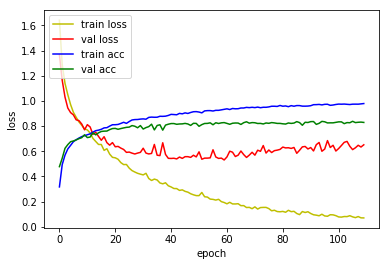

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.5305 - acc: 0.8276
Loss: 0.5304544613911555 Accuracy: 0.8275641

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.7423 - acc: 0.2468
Epoch 00001: val_loss improved from inf to 1.52437, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_4_conv_checkpoint/001-1.5244.hdf5
4680/4680 [==============================] - 25s 5ms/sample - loss: 1.7419 - acc: 0.2472 - val_loss: 1.5244 - val_acc: 0.3955
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.4600 - acc: 0.4028
Epoch 00002: val_loss improved from 1.52437 to 1.33028, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_4_conv_checkpoint/002-1.3303.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 1.4610 - acc: 0.4026 - val_loss: 1.3303 - val_acc: 0.4558
Epoch 3/500
4672/4680 [===========

Epoch 23/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.5105 - acc: 0.8164
Epoch 00023: val_loss did not improve from 0.55441
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.5110 - acc: 0.8160 - val_loss: 0.5699 - val_acc: 0.7885
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4985 - acc: 0.8273
Epoch 00024: val_loss improved from 0.55441 to 0.55125, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_4_conv_checkpoint/024-0.5512.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.4979 - acc: 0.8276 - val_loss: 0.5512 - val_acc: 0.8083
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4953 - acc: 0.8208
Epoch 00025: val_loss did not improve from 0.55125
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.4971 - acc: 0.8201 - val_loss: 0.5647 - val_acc: 0.7968
Epoch 26/500
4672/4680 [============================>.] - ETA

4672/4680 [============================>.] - ETA: 0s - loss: 0.2891 - acc: 0.8960
Epoch 00048: val_loss did not improve from 0.44451
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.2888 - acc: 0.8962 - val_loss: 0.4592 - val_acc: 0.8397
Epoch 49/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2566 - acc: 0.9073
Epoch 00049: val_loss did not improve from 0.44451
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.2563 - acc: 0.9075 - val_loss: 0.4578 - val_acc: 0.8372
Epoch 50/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2455 - acc: 0.9152
Epoch 00050: val_loss did not improve from 0.44451
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.2459 - acc: 0.9152 - val_loss: 0.4747 - val_acc: 0.8359
Epoch 51/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2489 - acc: 0.9086
Epoch 00051: val_loss did not improve from 0.44451
4680/4680 [==============================] - 24s 5m

Epoch 78/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1350 - acc: 0.9525
Epoch 00078: val_loss did not improve from 0.43743
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.1348 - acc: 0.9526 - val_loss: 0.4557 - val_acc: 0.8571
Epoch 79/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1142 - acc: 0.9604
Epoch 00079: val_loss did not improve from 0.43743
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.1141 - acc: 0.9605 - val_loss: 0.4915 - val_acc: 0.8577
Epoch 80/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1089 - acc: 0.9645
Epoch 00080: val_loss did not improve from 0.43743
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.1087 - acc: 0.9645 - val_loss: 0.5077 - val_acc: 0.8481
Epoch 81/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1250 - acc: 0.9557
Epoch 00081: val_loss did not improve from 0.43743
4680/4680 [===========================

4672/4680 [============================>.] - ETA: 0s - loss: 0.0560 - acc: 0.9837
Epoch 00108: val_loss did not improve from 0.43743
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0559 - acc: 0.9838 - val_loss: 0.5561 - val_acc: 0.8583
Epoch 109/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0795 - acc: 0.9726
Epoch 00109: val_loss did not improve from 0.43743
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0795 - acc: 0.9726 - val_loss: 0.5183 - val_acc: 0.8615

vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_4_conv Model


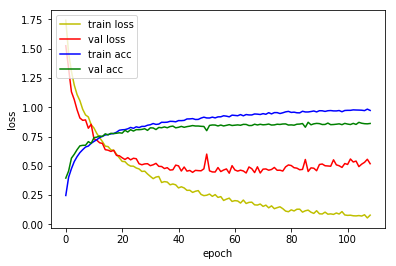

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.4374 - acc: 0.8513
Loss: 0.4374293573391743 Accuracy: 0.85128206

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.6553 - acc: 0.2860
Epoch 00001: val_loss improved from inf to 1.41945, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_5_conv_checkpoint/001-1.4194.hdf5
4680/4680 [==============================] - 26s 6ms/sample - loss: 1.6552 - acc: 0.2861 - val_loss: 1.4194 - val_acc: 0.4295
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.4018 - acc: 0.4167
Epoch 00002: val_loss improved from 1.41945 to 1.24160, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_5_conv_checkpoint/002-1.2416.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 1.4017 - acc: 0.4167 - val_loss: 1.2416 - val_acc: 0.4917
Epoch 3/500
4672/4680 [==========

Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3648 - acc: 0.8692
Epoch 00024: val_loss did not improve from 0.53103
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.3648 - acc: 0.8692 - val_loss: 0.5975 - val_acc: 0.7949
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3593 - acc: 0.8720
Epoch 00025: val_loss improved from 0.53103 to 0.48458, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_5_conv_checkpoint/025-0.4846.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.3591 - acc: 0.8722 - val_loss: 0.4846 - val_acc: 0.8179
Epoch 26/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3417 - acc: 0.8793
Epoch 00026: val_loss did not improve from 0.48458
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.3420 - acc: 0.8791 - val_loss: 0.5699 - val_acc: 0.7974
Epoch 27/500
4672/4680 [============================>.] - ETA

4672/4680 [============================>.] - ETA: 0s - loss: 0.0842 - acc: 0.9711
Epoch 00053: val_loss did not improve from 0.48106
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0841 - acc: 0.9712 - val_loss: 0.6141 - val_acc: 0.8333
Epoch 54/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0847 - acc: 0.9728
Epoch 00054: val_loss did not improve from 0.48106
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0847 - acc: 0.9729 - val_loss: 0.5524 - val_acc: 0.8468
Epoch 55/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0883 - acc: 0.9673
Epoch 00055: val_loss did not improve from 0.48106
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0882 - acc: 0.9673 - val_loss: 0.6174 - val_acc: 0.8333
Epoch 56/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1003 - acc: 0.9628
Epoch 00056: val_loss did not improve from 0.48106
4680/4680 [==============================] - 24s 5m

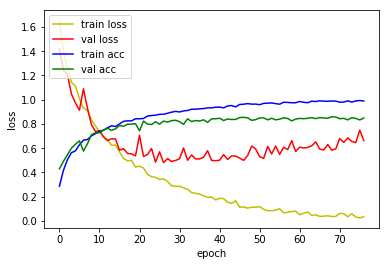

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.4811 - acc: 0.8224
Loss: 0.4810634467846308 Accuracy: 0.8224359



In [12]:
for i in range(2, 6):
    base = 'vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_64_DO(conv_num=i)
#     model = multi_gpu_model(model, gpus=2)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train, y_train, batch_size=64, epochs=500, 
                     validation_data=[x_val, y_val], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [13]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(2, 6):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_2_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 64)      4864      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 64)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 64)      102464    
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 64)      0         
_________________________________________________________________
max_pooling

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.4811 - acc: 0.8224
Loss: 0.4810634467846308 Accuracy: 0.8224359


In [14]:
for i in range(2, 6):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_075_DO_2_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 64)      4864      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 64)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 64)      102464    
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 64)      0         
_________________________________________________________________
max_pooling

1560/1560 [==============================] - 5s 3ms/sample - loss: 0.6622 - acc: 0.8487
Loss: 0.6621536756173159 Accuracy: 0.8487179
